In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches = pd.read_csv('ipldata_19/matches.csv')
deliveries = pd.read_csv('ipldata_19/deliveries.csv')

In [3]:
matches.shape

(756, 18)

In [4]:
deliveries.shape

(179078, 21)

In [5]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Toss Winner == Match Winner

In [6]:
temp_df = matches[matches['toss_winner'] == matches['winner']]

In [9]:
temp_df.shape

(393, 18)

In [10]:
matches.shape

(756, 18)

In [11]:
temp_df.shape[0] / matches.shape[0] * 100

51.98412698412699

# Winner per season

In [15]:
matches.drop_duplicates('season',keep='last')[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


# Highest score in a single match

In [21]:
deliveries.groupby(['match_id','batsman'])['batsman_runs'].sum().sort_values(ascending=False).head()

match_id  batsman       
411       CH Gayle          175
60        BB McCullum       158
562       AB de Villiers    133
7935      RR Pant           130
620       AB de Villiers    129
Name: batsman_runs, dtype: int64

In [22]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

# Most runs in IPL

In [24]:
deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head()

batsman
V Kohli      5434
SK Raina     5415
RG Sharma    4914
DA Warner    4741
S Dhawan     4632
Name: batsman_runs, dtype: int64

In [30]:
len(deliveries['match_id'].unique())

756

In [37]:
# matches['season'].value_counts().sort_values()

2009    57
2008    58
2017    59
2015    59
2019    60
2018    60
2016    60
2014    60
2010    60
2011    73
2012    74
2013    76
Name: season, dtype: int64

# Most runs by a team in a single match

In [75]:
deliveries.groupby(['match_id','batting_team'])['total_runs'].sum().sort_values(ascending=False).head()

match_id  batting_team               
411       Royal Challengers Bangalore    263
7937      Kolkata Knight Riders          250
620       Royal Challengers Bangalore    248
206       Chennai Super Kings            246
11338     Kolkata Knight Riders          241
Name: total_runs, dtype: int64

# Orange Cap - 2017

In [40]:
data_2017 = deliveries[deliveries['match_id'] <= 59]

In [41]:
data_2017.shape

(13862, 21)

In [43]:
data_2017['match_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59], dtype=int64)

In [45]:
data_2017.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head()

batsman
DA Warner    641
G Gambhir    498
S Dhawan     479
SPD Smith    472
SK Raina     442
Name: batsman_runs, dtype: int64

# Orange Cap - 2010

In [48]:
m_id = matches[matches['season'] == 2010]['id']

In [49]:
len(m_id)

60

In [58]:
m_id.iloc[0]

175

In [59]:
m_id.iloc[-1]

234

In [71]:
# data_2010 = deliveries[(deliveries['match_id'] >= 175) & (deliveries['match_id'] <= 234) ]
data_2010 = deliveries[(deliveries['match_id'] >= m_id.iloc[0]) & (deliveries['match_id'] <= m_id.iloc[-1]) ]

In [72]:
data_2010.shape

(14498, 21)

In [73]:
# data_2010['match_id'].unique()
len(data_2010['match_id'].unique())

60

In [74]:
data_2010.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head()

batsman
SR Tendulkar    618
JH Kallis       572
SK Raina        528
SC Ganguly      493
M Vijay         458
Name: batsman_runs, dtype: int64

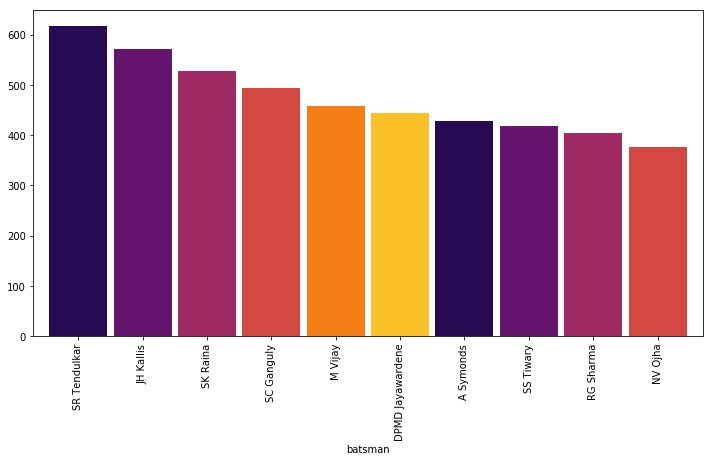

In [79]:
plt.figure(figsize=(12,6))
data_2010.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot.bar(color=sns.color_palette('inferno'), width=0.9)